# Fonction corrections

A faire : réflexion sur quoi faire, fonction décaler l'injection

Imports utiles 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Fonction qui corrige les valeurs impossible pour une dataframe entiere : a accélérer si possible

In [2]:
def correction_valeurs_absurdes(new_df, old_df):

    # Correction de la première ligne
    
    if not old_df.empty :

        n_old = old_df['Temps'].size # longueur de la df précendentes

        # on enregistre les valeurs utiles
        new_freqCardiaque = new_df['FrequenceCardiaque'][0]
        old_freqCardiaque = old_df['FrequenceCardiaque'][n_old-1]
        new_freqRespiratoire = new_df['FrequenceRespiratoire'][0]
        old_freqRespiratoire = old_df['FrequenceRespiratoire'][n_old-1]

        # Freq Cardiaque

         #Cas ou bornes dépassées
        if new_freqCardiaque > 350 or new_freqCardiaque < 100:
            new_df['FrequenceCardiaque'][0] = old_freqCardiaque

        # Cas ou trop gros bon : enlevé pour l'instant car mauvais résultats

        # Freq respiratoire :
        if new_freqRespiratoire > 70 or new_freqRespiratoire < 20:
            new_df['FrequenceCardiaque'][0] = old_freqRespiratoire
    
    else: # Cas ou c'est le premier fichier : si il est hors des bornes, on ne lui attribue pas de valeur
        new_freqCardiaque = new_df['FrequenceCardiaque'][0]
        new_freqRespiratoire = new_df['FrequenceRespiratoire'][0]
        if new_freqCardiaque > 350 or new_freqCardiaque < 100 :
            new_df['FrequenceCardiaque'][0] = np.nan


    # Correction des lignes suivantes  :

    n_new = new_df['Temps'].size

    for row in range(1, n_new):

        # Données utile
        old_freqCardiaque = new_freqCardiaque
        new_freqCardiaque = new_df['FrequenceCardiaque'][row]
        old_freqRespiratoire = new_freqRespiratoire
        new_freqRespiratoire = new_df['FrequenceRespiratoire'][row]

        # Freq Cardiaque

         #Cas ou bornes dépassées
        if new_freqCardiaque > 350 or new_freqCardiaque < 100:
            new_df['FrequenceCardiaque'][row] = old_freqCardiaque

        # Cas ou trop gros bon : enlevé pour l'instant car mauvais résultats

        # Freq respiratoire :

        if new_freqRespiratoire > 70 or new_freqRespiratoire < 20:
            new_df['FrequenceCardiaque'][row] = old_freqRespiratoire

Fonction pour décaler une injection

In [3]:
#  A faire...

Fonction qui prend un path et qui importe puis applique les fonctions

In [5]:
# Import du fichier

#path1 = os.getcwd()
path1 = "C:\\Users\\Mateo Agudelo\\Documents\\Universidad\\IMT\\Projet Entreprise\\Projet Lapin\\2020\\Traitement de données\\test-traitement-données"
path2 = "\\data\\data-groupe1\\"
path = path1 + path2

assert os.path.isdir(path), "Le path n'existe pas."
print("L'importation a fonctionné super nickel")
with os.scandir(path) as temp:
    file_list = [file.name for file in temp if os.path.isfile(file)]

L'importation a fonctionné super nickel


### Correction :

In [7]:
# Liste de dataframes
liste_dataframes = []
for file in file_list:
    liste_dataframes.append(pd.read_csv(path+file))

# Nb de lignes à corriger
nb_lignes_totales = 0
for df in liste_dataframes:
    nb_lignes_totales += df['Temps'].size

# Initialisation
data_a_corriger = pd.DataFrame()
nb_fichier = len(file_list)
nb_lignes_traitees = 0

# Correction dataframe par dataframe

for i in range(0, nb_fichier):

    # Affichage de l'avancement
    avancement = nb_lignes_traitees / nb_lignes_totales * 100
    print(f"Avancement actuel : {avancement}% effectué")

    # Correction
    data_corrigee = data_a_corriger
    data_a_corriger = liste_dataframes[i]
    print(data_a_corriger)
    correction_valeurs_absurdes(data_a_corriger, data_corrigee)

    nb_lignes_traitees += data_a_corriger['Temps'].size

print("Fini")

OSError: Initializing from file failed

### Affichage et comparaison

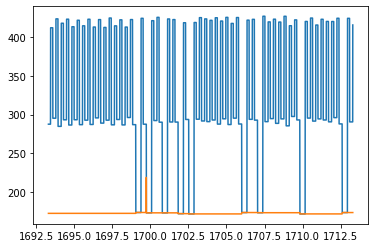

In [19]:
i = 10
data_avant = pd.read_csv(path + file_list[i-1])
data_apres = liste_dataframes[i]
debut = 80 * 1000
fin = 100 * 1000
x_avant = data_avant['Temps'][debut:fin]
y_avant = data_avant['FrequenceCardiaque'][debut:fin]
x_apres = data_apres['Temps'][debut:fin]
y_apres = data_apres['FrequenceCardiaque'][debut:fin]

plt.plot(x_avant, y_avant)
plt.plot(x_apres, y_apres)
plt.show()




### Exportation